### Phân tích dữ liệu

In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [79]:
csv_folder="./data/04/"
# "count_#6"= lion
# "count_#7"= boar
# "count_#8"= leopard
count_good=0
count_dead_boar=0
count_dead_tiger=0
count_dead_leopard=0
data_list=[]
lion_list=[]
boar_list=[]
leopard_list=[]
num_data=len(os.listdir(csv_folder))
for filename in os.listdir(csv_folder):
    data_frame=pd.read_csv(os.path.join(csv_folder,filename))
    last_id=len(data_frame)-1
    lion_list.append(data_frame['count_#6'])
    boar_list.append(data_frame['count_#7'])
    leopard_list.append(data_frame['count_#8'])
    # data_list.append(data_frame)
    # print(data_frame['count_#6'][10000])
    if data_frame['count_#6'][last_id]>0 and data_frame['count_#7'][last_id]>0 and data_frame['count_#8'][last_id]>0:
        count_good+=1
    if data_frame['count_#7'][last_id]==0:
        count_dead_boar+=1
    if data_frame['count_#6'][last_id]==0:
        count_dead_tiger+=1
    if data_frame['count_#8'][last_id]==0:
        count_dead_leopard+=1

print("Tổng số trường hợp xét: ",len(os.listdir(csv_folder)))
print("Số trường hợp không con nào chết: ",count_good)
print("Số trường hợp lợn chết: ",count_dead_boar)
print("Số trường hợp hổ chết: ",count_dead_tiger)
print("Số trường hợp báo chết: ",count_dead_leopard)

# print(count_good)
    # break

Tổng số trường hợp xét:  25
Số trường hợp không con nào chết:  25
Số trường hợp lợn chết:  0
Số trường hợp hổ chết:  0
Số trường hợp báo chết:  0


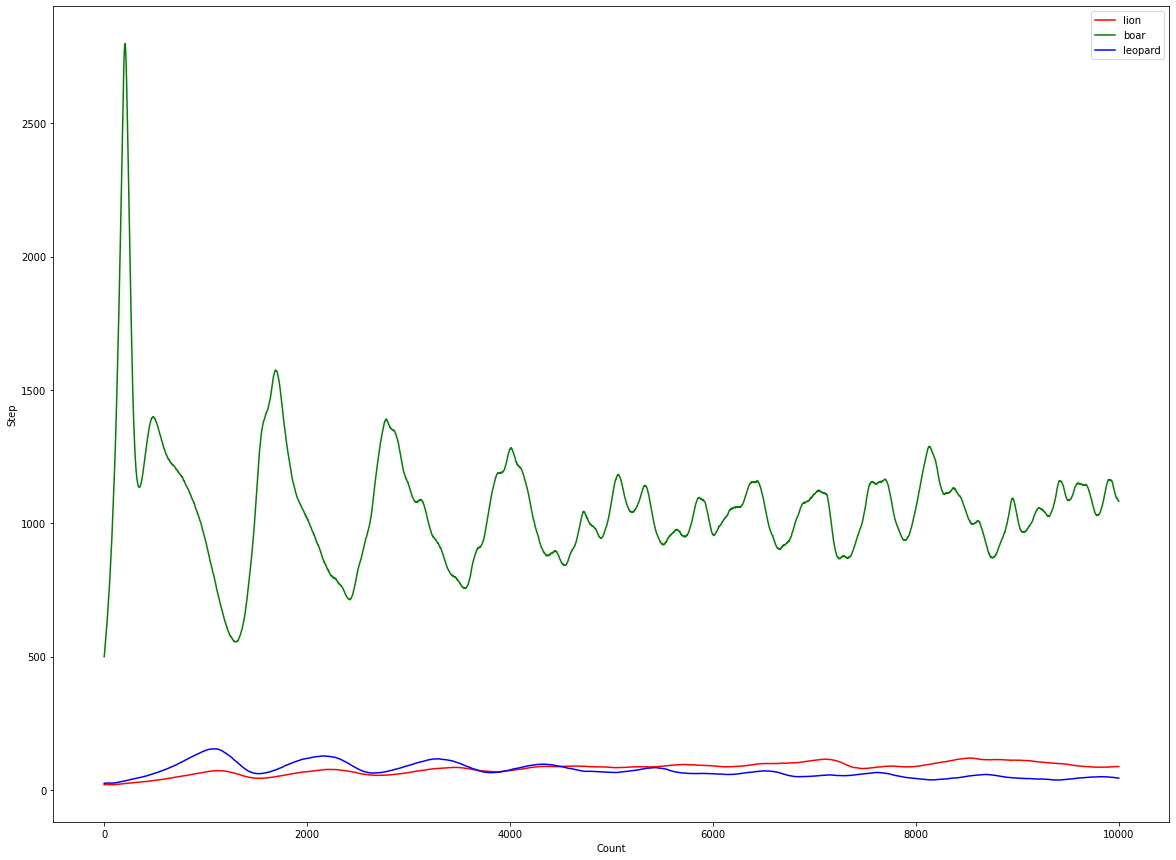

In [23]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)


x=[i for i in range(len(data_frame["count_#6"]))]

y1=sum(lion_list)/num_data
y2=sum(boar_list)/num_data
y3=sum(leopard_list)/num_data

# Plotting both the curves simultaneously
plt.plot(x, y1, color='r', label='lion')
plt.plot(x, y2, color='g', label='boar')
plt.plot(x, y3, color='blue', label='leopard')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Count")
plt.ylabel("Step")
# plt.title("Sine and Cosine functions")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [13]:
45/147*0.5

0.15306122448979592

In [19]:
1/556

0.0017985611510791368